In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sys import argv

pd.set_option("display.max_columns", None)

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick

get_ipython().run_line_magic("matplotlib", "inline")

import copy
import os

results_all = {}

<IPython.core.display.Javascript object>

In [8]:
import os
from scipy.ndimage.filters import gaussian_filter1d
import matplotlib.ticker as ticker
import os
import glob


dfs = []
mydict = {}
# ["bpic2012", "bpic2017", "traficFines"]
datasets = ["bpic2012", "bpic2017", "traficFines"]  # "traficFines"
for dataset_name in datasets:

    iterations = [1, 2, 3]
    for it in iterations:

        directory = os.path.join(
            "./results/%s/%s/resources_%s/resultsResources_%s/"
            % (dataset_name, dataset_name, dataset_name, it)
        )
        for root, dirs, files in os.walk(directory):
            title = root
            for dirr in dirs:
                path = directory + dirr
                csv_files = glob.glob(os.path.join(path, "*.csv"))
                # loop over the list of csv files
                for f in csv_files:
                    df = pd.read_csv(f, sep=";")
                    df.name = str(f).split("/")[-1].split("_")[2]
                    dfs.append(df)

        gains = {}  # {name: df.gain}
        sum_gaines = {}  # {nr_resource: sum(df.gain)}

        def millions(x, pos):
            "The two args are the value and tick position"
            return "%1.1fK" % (x * 1e-3)

        for df in dfs:

            gains[df.name] = gaussian_filter1d(df.gain, sigma=20)
            try:
                sum_gaines[int(df.name)] = sum(df.gain)
            except:
                sum_gaines[df.name] = sum(df.gain)

        import matplotlib.pylab as plt
        import pylab as pl
        from matplotlib.ticker import FuncFormatter

        from matplotlib.pyplot import figure

        import matplotlib.pyplot as plt

        plt.rcParams["figure.figsize"] = (8, 5)

        def millions(x, pos):
            "The two args are the value and tick position"
            return "%1.1fK" % (x * 1e-3)

        formatter = FuncFormatter(millions)

        lists = sorted(sum_gaines.items())  # sorted by key, return a list of tuples

        x, y = zip(*lists)  # unpack a list of pairs into two tuples
        mydict[it] = lists
        fig, ax = plt.subplots()

        ax.plot(x, y, label="total gain", marker="s")

        for xs, ys in zip(x, y):
            pl.text(
                xs, ys, "%1.1f" % (ys * 1e-3), fontsize=8, fontweight="bold",
            )

        plt.grid(True)
        ax.yaxis.set_major_formatter(formatter)
        plt.legend(loc="best")
        plt.ylabel("Total Gain")
        plt.xlabel("# Avaible Resources")
        plt.title("Total gain / resource")
        plt.tight_layout()
        plt.show()

    combined_tuples = []
    for k, v in mydict.items():
        [combined_tuples.append(tuple(sub)) for sub in v]

    combined_tuples

    # Combine the tuples from all lists into a single list of tuples
    # combined_tuples #= x + y + z

    # Create a dictionary to store the sum and count for each key
    sum_count_dict = {}
    for key, value in combined_tuples:
        if key not in sum_count_dict:
            sum_count_dict[key] = [value, 1]
        else:
            sum_count_dict[key][0] += value
            sum_count_dict[key][1] += 1

    # Calculate the average value for each key
    averages = {
        key: sum_value / count for key, (sum_value, count) in sum_count_dict.items()
    }

    # Print the average values for each key
    for key, average in averages.items():
        print(f"({key}, {average})")

    print(
        f"\nKey: {max(averages, key=averages.get)}, max: {averages[max(averages, key=averages.get)]}"
    )

    my_list = list(averages.items())

    x, y = zip(*my_list)  # unpack a list of pairs into two tuples
    fig, ax = plt.subplots()

    ax.plot(x, y, label="total gain", marker="s")

    for xs, ys in zip(x, y):
        pl.text(
            xs, ys, "%1.1f" % (ys * 1e-3), fontsize=8, fontweight="bold",
        )

    plt.grid(True)
    ax.yaxis.set_major_formatter(formatter)
    plt.legend(loc="best")
    plt.ylabel("Total Gain")
    plt.xlabel("# Avaible Resources")
    plt.title("Total gain / resource")
    plt.tight_layout()
    plt.show()

    results_all[dataset_name] = my_list
    results_all

<IPython.core.display.Javascript object>

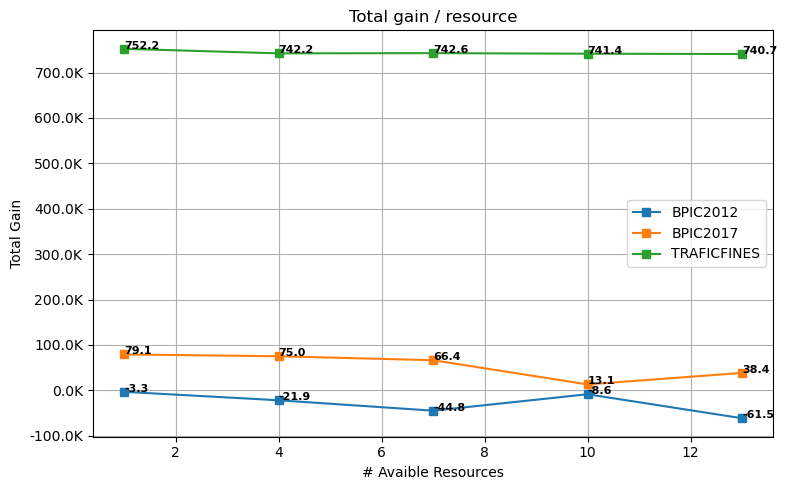

<IPython.core.display.Javascript object>

In [3]:
fig, ax = plt.subplots()

for k, v in results_all.items():
    my_list = v
    x, y = zip(*my_list)  # unpack a list of pairs into two tuples

    ax.plot(x[::3], y[::3], label="%s" % k.upper(), marker="s")

    for xs, ys in zip(x[::3], y[::3]):
        pl.text(
            xs, ys, "%1.1f" % (ys * 1e-3), fontsize=8, fontweight="bold",
        )

plt.grid(True)
ax.yaxis.set_major_formatter(formatter)
plt.legend(loc="best")
plt.ylabel("Total Gain")
plt.xlabel("# Avaible Resources")
plt.title("Total gain / resource")
plt.tight_layout()

plt.show()


